In [5]:
import sys
sys.path.append('C:/Users/User/Desktop/Projects/FootballIndex/')
sys.path.append('C:/Users/User/PycharmProjects/FootballIndex/')

In [6]:
from utils.etl.sql_server import sql_query
from utils.eda.returns import returns_dataframe
import pandas as pd

## Media Buzz & Prices Data

In [30]:
# Read in media buzz data
media_buzz_df = sql_query('select * from media where Date >= "2020-09-01"')
media_buzz_df.head()

,Date,Name,OptaID,ID,URL,Rank,MediaBuzz
0,2020-09-01,Donny van de Beek,p180184,donny-van-de-beek,https://www.footballindex.co.uk/player/donny-v...,1,1830.0
1,2020-09-01,Lionel Messi,p19054,lionel-messi,https://www.footballindex.co.uk/player/lionel-...,2,1300.0
2,2020-09-01,Gabriel Magalhaes,p226597,gabriel-magalhaes,https://www.footballindex.co.uk/player/gabriel...,3,880.0
3,2020-09-01,Dayot Upamecano,p199661,dayotchanculle-upamecano,https://www.footballindex.co.uk/player/dayotch...,4,460.0
4,2020-09-01,Kai Havertz,p219847,kai-havertz,https://www.footballindex.co.uk/player/kai-hav...,5,350.0


In [31]:
# Read in prices data
prices_df = sql_query('select * from prices where Date >= "2020-09-01"')
prices_df.head()

,Date,Name,OptaID,ID,URL,Country,Team,Position,Price
0,2020-09-01,Jadon Sancho,p209243,jadon-sancho,https://www.footballindex.co.uk/player/jadon-s...,England,Borussia Dortmund,Midfielder,14.63
1,2020-09-01,Trent Alexander-Arnold,p169187,trent-alexander-arnold,https://www.footballindex.co.uk/player/trent-a...,England,Liverpool,Defender,10.45
2,2020-09-01,Kylian Mbappé,p220160,kylian-mbappé,https://www.footballindex.co.uk/player/kylian-...,France,Paris Saint-Germain,Forward,10.35
3,2020-09-01,Neymar,p61278,neymar,https://www.footballindex.co.uk/player/neymar,Brazil,Paris Saint-Germain,Forward,10.34
4,2020-09-01,Bruno Fernandes,p141746,bruno-fernandes,https://www.footballindex.co.uk/player/bruno-f...,Portugal,Manchester United,Midfielder,10.23


### Timeseries Plot of Footy

In [57]:
footy = prices_df.groupby('Date').sum()
footy_rets = round(((footy.iloc[-1, 0] / footy.iloc[0, 0]) - 1) * 100, 2)

Footy returns between 2020-09-01 and 2020-11-07: -11.31


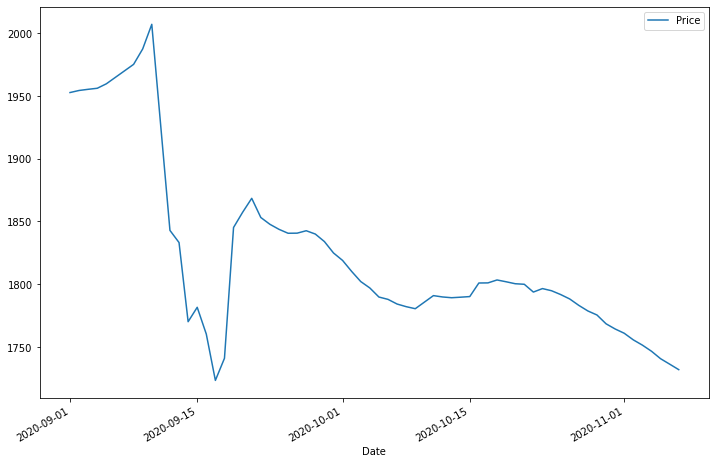

In [60]:
footy.plot(figsize=(12,8))
print(f'Footy returns between {footy.index.min().strftime("%Y-%m-%d")} and {footy.index.max().strftime("%Y-%m-%d")}: {footy_rets}')

In [61]:
rets_df = returns_dataframe(prices_df)
rets_df['Relative'] = rets_df['Returns_%'] - footy_rets
rets_df.head()

,Name,Country,Team,Position,Returns_%,Relative
0,Jadon Sancho,England,Borussia Dortmund,Midfielder,-39.99,-28.68
1,Trent Alexander-Arnold,England,Liverpool,Defender,-42.01,-30.70
2,Kylian Mbappé,France,Paris Saint-Germain,Forward,-15.46,-4.15
3,Neymar,Brazil,Paris Saint-Germain,Forward,-21.57,-10.26
4,Bruno Fernandes,Portugal,Manchester United,Midfielder,-28.35,-17.04


### Top 10

In [62]:
rets_df.sort_values('Relative', ascending=False).head(10)

,Name,Country,Team,Position,Returns_%,Relative
3093,Gaston Silva,Uruguay,Independiente,Defender,118.18,129.49
2913,Johan Mojica,Colombia,Girona,Defender,93.33,104.64
2438,Gianmarco Ferrari,Italy,Sassuolo,Defender,90.48,101.79
2778,Andrej Galabinov,Bulgaria,Spezia,Forward,88.24,99.55
1381,Alessandro Florenzi,Italy,Roma,Defender,88.10,99.41
2985,Marwin Hitz,Switzerland,Borussia Dortmund,Goalkeeper,71.43,82.74
1801,Cristian Tello,Spain,Real Betis,Forward,68.75,80.06
3299,Aleksandar Jovanovic,Serbia,Huesca,Goalkeeper,62.50,73.81
930,Patrick Bamford,England,Leeds United,Forward,57.38,68.69
1188,Federico Dimarco,Italy,Verona,Defender,57.14,68.45


### Bottom 10

In [65]:
rets_df.sort_values('Relative').head(10)

,Name,Country,Team,Position,Returns_%,Relative
306,Odion Ighalo,Nigeria,Manchester United,Forward,-85.94,-74.63
430,Philipp Max,Germany,FC Augsburg,Defender,-69.23,-57.92
1068,Santi Cazorla,Spain,Villarreal,Midfielder,-66.04,-54.73
492,Ruben Vinagre,Portugal,Wolverhampton Wanderers,Defender,-65.96,-54.65
904,Wayne Rooney,England,Derby County,Forward,-59.68,-48.37
580,Moussa Wague,Senegal,Barcelona,Defender,-59.52,-48.21
84,Ruben Loftus-Cheek,England,Chelsea,Midfielder,-58.85,-47.54
1080,Aaron Mooy,Australia,Brighton and Hove Albion,Midfielder,-58.49,-47.18
118,Paulinho,Brazil,Bayer 04 Leverkusen,Forward,-58.02,-46.71
1928,Stefan Mitrovic,Serbia,Strasbourg,Defender,-56.67,-45.36


### By Country

                    Returns_%  Relative
Country                                
Burundi                -39.47    -28.16
Gabon                  -78.58    -22.03
Tanzania               -31.43    -20.12
Martinique             -26.26     -3.64
Dominican Republic      -8.45      2.86
...                       ...       ...
England              -1896.70   1281.41
Germany               -936.23   1563.28
France               -1693.31   2152.09
Italy                  252.03   2932.50
Spain                 -377.04   3490.98

[110 rows x 2 columns]


<AxesSubplot:xlabel='Country'>

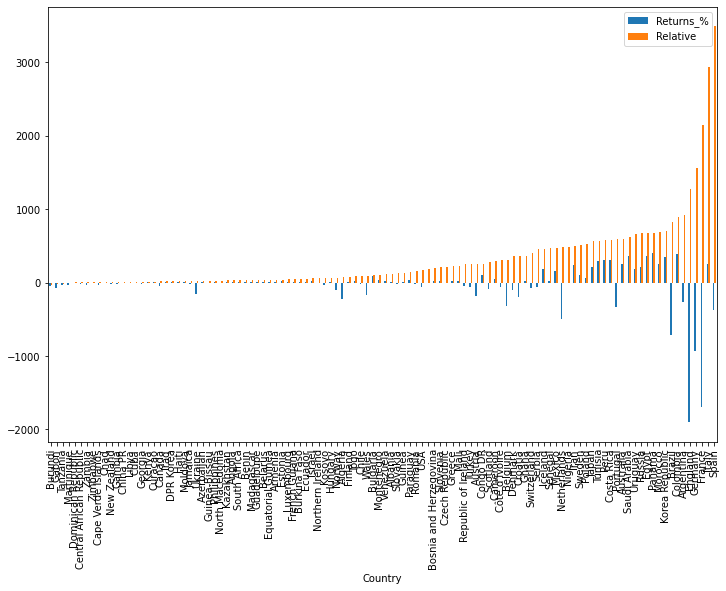

In [67]:
country = rets_df.groupby('Country').sum().sort_values('Relative')
print(country)
country.plot(figsize=(12,8), kind='bar')

### By Team

In [69]:
team = rets_df.groupby('Team').sum().sort_values('Relative')
print(team)

                     Returns_%  Relative
Team                                    
Manchester United      -736.94   -341.09
Manchester City        -492.51   -198.45
Liverpool              -536.86   -152.32
Chelsea                -493.66   -120.43
Bayer 04 Leverkusen    -357.58    -86.14
...                        ...       ...
Angers                   48.05    353.42
Verona                  103.72    375.16
Lecce                   113.98    396.73
Parma                   116.98    478.90
Panama                  318.07    499.03

[381 rows x 2 columns]


### By Position

            Returns_%  Relative
Position                       
Midfielder   -3224.03  10449.76
Forward      -3040.64   5419.24
Striker         18.18     40.80
Goalkeeper     841.61   4166.75
Defender      1931.75  14191.79


<AxesSubplot:xlabel='Position'>

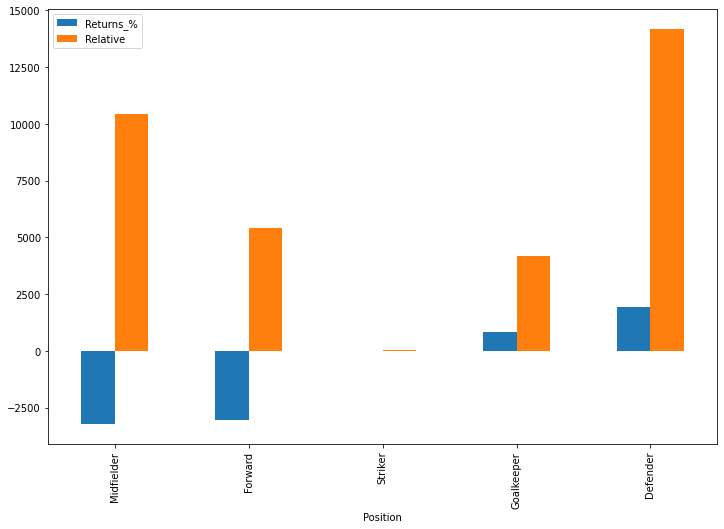

In [70]:
position = rets_df.groupby('Position').sum().sort_values('Returns_%')
print(position)
position.plot(figsize=(12,8), kind='bar')

### Want to see how the media buzz 'winners' performed over the period

In [71]:
# Group media buzz dataframe
media_grouped = media_buzz_df.groupby('Name').sum()[['MediaBuzz']].reset_index()
media_grouped

,Name,MediaBuzz
0,Aaron Connolly,100.0
1,Aaron Ramsdale,180.0
2,Aaron Ramsey,300.0
3,Aaron Wan-Bissaka,1280.0
4,Abdoulaye Doucoure,570.0
...,...,...
727,Youri Tielemans,140.0
728,Yves Bissouma,70.0
729,Zlatan Ibrahimović,1760.0
730,Álvaro Morata,930.0


In [73]:
# Merge the price returns by player on to this media_grouped dataframe
merged = pd.merge(media_grouped, rets_df, 'left', 'Name')[
    ['Name', 'Country', 'Team', 'Position', 'MediaBuzz', 'Returns_%', 'Relative']
]
merged.sort_values('MediaBuzz', ascending=False, inplace=True)
merged.head(10)

,Name,Country,Team,Position,MediaBuzz,Returns_%,Relative
235,Gareth Bale,Wales,Real Madrid,Forward,21270.0,26.00,37.31
290,Jadon Sancho,England,Borussia Dortmund,Midfielder,18230.0,-39.99,-28.68
675,Thomas Partey,Ghana,Atlético de Madrid,Midfielder,17940.0,5.69,17.00
411,Lionel Messi,Argentina,Barcelona,Forward,17500.0,-32.44,-21.13
700,Virgil van Dijk,Netherlands,Liverpool,Defender,15830.0,-42.19,-30.88
196,Edinson Cavani,Uruguay,Paris Saint-Germain,Forward,15050.0,51.16,62.47
445,Marcus Rashford,England,Manchester United,Forward,14760.0,-26.61,-15.30
182,Donny van de Beek,Netherlands,Ajax,Midfielder,13790.0,-41.79,-30.48
549,Paul Pogba,France,Manchester United,Midfielder,11390.0,-52.37,-41.06
473,Mesut Ozil,Germany,Arsenal,Midfielder,11200.0,-25.00,-13.69
